# Multi-Class Classification with Perceptron

Lab Assignment from [AI for Beginners Curriculum](https://github.com/microsoft/ai-for-beginners).

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

You can use the following perceptron training code from the lecture:

In [6]:
def train(positive_examples, negative_examples, num_iterations = 100):
    num_dims = positive_examples.shape[1]
    weights = np.zeros((num_dims + 1, 1))  # initialize weights, adding one for the bias term    
    
    pos_count = positive_examples.shape[0]
    neg_count = negative_examples.shape[0]
    
    report_frequency = 10
    
    for i in range(num_iterations):
        pos = random.choice(positive_examples)
        neg = random.choice(negative_examples)

        z = np.dot(pos, weights)   
        if z < 0:
            weights = weights + pos.reshape(weights.shape)

        z  = np.dot(neg, weights)
        if z >= 0:
            weights = weights - neg.reshape(weights.shape)
            
        if i % report_frequency == 0:             
            pos_out = np.dot(positive_examples, weights)
            neg_out = np.dot(negative_examples, weights)        
            pos_correct = (pos_out >= 0).sum() / float(pos_count)
            neg_correct = (neg_out < 0).sum() / float(neg_count)
            print("Iteration={}, pos correct={}, neg correct={}".format(i,pos_correct,neg_correct))

    return weights

In [7]:
def accuracy(weights, test_x, test_labels):
    res = np.dot(np.c_[test_x,np.ones(len(test_x))],weights)
    return (res.reshape(test_labels.shape)*test_labels>=0).sum()/float(len(test_labels))

In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Sample synthetic data for demonstration
# Generate positive examples (e.g., points centered at (1, 1))
positive_examples = np.random.randn(100, 2) + np.array([1, 1])

# Generate negative examples (e.g., points centered at (-1, -1))
negative_examples = np.random.randn(100, 2) + np.array([-1, -1])

# Combine positive and negative examples into test set
test_x = np.vstack([positive_examples, negative_examples])
test_labels = np.array([1]*len(positive_examples) + [-1]*len(negative_examples))

# Run the training function
wts = train(positive_examples, negative_examples)  # Train to get the weights

# Calculate accuracy on test data
acc = accuracy(wts, test_x, test_labels)
print("Accuracy:", acc)

ValueError: shapes (2,) and (3,1) not aligned: 2 (dim 0) != 3 (dim 0)

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

def train(positive_examples, negative_examples, num_iterations=100):
    num_dims = positive_examples.shape[1]
    weights = np.zeros((num_dims + 1, 1))  # initialize weights, adding one for the bias term

    pos_count = positive_examples.shape[0]
    neg_count = negative_examples.shape[0]
    
    report_frequency = 10
    
    for i in range(num_iterations):
        pos = np.append(random.choice(positive_examples), 1)  # Append bias term to positive example
        neg = np.append(random.choice(negative_examples), 1)  # Append bias term to negative example

        z = np.dot(pos, weights)
        if z < 0:
            weights = weights + pos.reshape(weights.shape)

        z = np.dot(neg, weights)
        if z >= 0:
            weights = weights - neg.reshape(weights.shape)
            
        if i % report_frequency == 0:
            pos_out = np.dot(np.c_[positive_examples, np.ones(pos_count)], weights)
            neg_out = np.dot(np.c_[negative_examples, np.ones(neg_count)], weights)
            pos_correct = (pos_out >= 0).sum() / float(pos_count)
            neg_correct = (neg_out < 0).sum() / float(neg_count)
            print("Iteration={}, pos correct={}, neg correct={}".format(i, pos_correct, neg_correct))

    return weights

def accuracy(weights, test_x, test_labels):
    res = np.dot(np.c_[test_x, np.ones(len(test_x))], weights)  # Add bias term to test_x
    return (res.reshape(test_labels.shape) * test_labels >= 0).sum() / float(len(test_labels))

# Sample synthetic data for demonstration
# Generate positive examples (e.g., points centered at (1, 1))
positive_examples = np.random.randn(100, 2) + np.array([1, 1])

# Generate negative examples (e.g., points centered at (-1, -1))
negative_examples = np.random.randn(100, 2) + np.array([-1, -1])

# Combine positive and negative examples into test set
test_x = np.vstack([positive_examples, negative_examples])
test_labels = np.array([1] * len(positive_examples) + [-1] * len(negative_examples))

# Run the training function
wts = train(positive_examples, negative_examples)  # Train to get the weights

# Calculate accuracy on test data
acc = accuracy(wts, test_x, test_labels)
print("Accuracy:", acc)


Iteration=0, pos correct=0.87, neg correct=0.96
Iteration=10, pos correct=0.87, neg correct=0.96
Iteration=20, pos correct=0.98, neg correct=0.82
Iteration=30, pos correct=0.97, neg correct=0.85
Iteration=40, pos correct=0.95, neg correct=0.93
Iteration=50, pos correct=0.95, neg correct=0.94
Iteration=60, pos correct=0.96, neg correct=0.95
Iteration=70, pos correct=0.96, neg correct=0.95
Iteration=80, pos correct=0.89, neg correct=0.98
Iteration=90, pos correct=0.89, neg correct=0.96
Accuracy: 0.945


### Reading the Dataset

This code download the dataset from the repository on the internet. You can also manually copy the dataset from `/data` directory of AI Curriculum repo.

In [ ]:
!rm -f *.pkl  # Ensure no .pkl files exist
!wget https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz -O mnist.pkl.gz
!gzip -d mnist.pkl.gz


--2024-11-07 08:38:43--  https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mnielsen/neural-networks-and-deep-learning/master/data/mnist.pkl.gz [following]
--2024-11-07 08:38:44--  https://raw.githubusercontent.com/mnielsen/neural-networks-and-deep-learning/master/data/mnist.pkl.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17051982 (16M) [application/octet-stream]
Saving to: ‘mnist.pkl.gz’

mnist.pkl.gz        100%[===================>]  16.26M  --.-KB/s    in 0.07s   

2024-11-07 08:38:52 (245 MB/s

In [ ]:
with open('mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle, encoding='latin1')

In [ ]:
print(type(MNIST))
print(MNIST)

<class 'tuple'>
((array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([5, 0, 4, ..., 8, 4, 8])), (array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([3, 8, 6, ..., 5, 6, 8])), (array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([7, 2, 1, ..., 4, 5, 6])))


In [ ]:
print(len(MNIST))  # This will show the number of elements in the tuple
print(type(MNIST[0]))  # This will show the type of the first element in the tuple
print(type(MNIST[1]))  # This will show the type of the second element, and so on

3
<class 'tuple'>
<class 'tuple'>


In [ ]:
print(len(MNIST))  # Number of top-level elements
print(type(MNIST[0]), type(MNIST[1]))  # Check types of each element at the top level
print(MNIST[0])  # Print the first element's contents
print(MNIST[1])  # Print the second element's contents

3
<class 'tuple'> <class 'tuple'>
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([5, 0, 4, ..., 8, 4, 8]))
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([3, 8, 6, ..., 5, 6, 8]))


In [ ]:
# Assuming the first element in MNIST contains both features and labels as separate arrays
features, labels = MNIST[0]  # Adjust based on the structure
features = features.astype(np.float32) / 256.0  # Normalize feature values

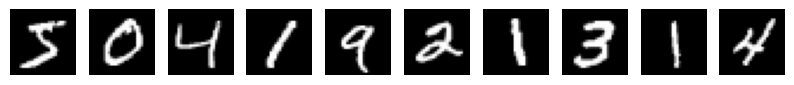

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(1, 10, i + 1)
    ax.imshow(features[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()

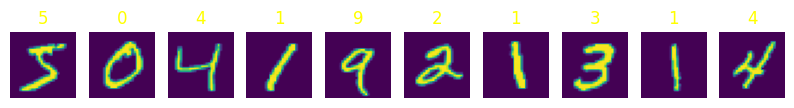

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming features and labels are already defined and normalized
# features, labels = MNIST[0]

fig = plt.figure(figsize=(10, 5))
for i in range(10):
    ax = fig.add_subplot(1, 10, i + 1)
    ax.imshow(features[i].reshape(28, 28), cmap='viridis')  # Use a color map similar to the image
    ax.axis('off')
    ax.set_title(str(labels[i]), color="yellow")  # Display label as title in yellow

plt.show()

In [ ]:
# print(MNIST['Train']['Features'][0][130:180])
# print(MNIST['Train']['Labels'][0])
# features = MNIST['Train']['Features'].astype(np.float32) / 256.0
# labels = MNIST['Train']['Labels']
# fig = plt.figure(figsize=(10,5))
# for i in range(10):
#     ax = fig.add_subplot(1,10,i+1)
#     plt.imshow(features[i].reshape(28,28))
# plt.show()

TypeError: tuple indices must be integers or slices, not str

Code to create *one-vs-other* dataset for two-digit classification. You need to modify this code to create *one-vs-all* dateset.

In [ ]:
# def set_mnist_pos_neg(positive_label, negative_label):
#     positive_indices = [i for i, j in enumerate(MNIST['Train']['Labels']) 
#                           if j == positive_label]
#     negative_indices = [i for i, j in enumerate(MNIST['Train']['Labels']) 
#                           if j == negative_label]

#     positive_images = MNIST['Train']['Features'][positive_indices]
#     negative_images = MNIST['Train']['Features'][negative_indices]

#     return positive_images, negative_images

In [ ]:
def set_mnist_pos_neg(positive_label, negative_label):
    # Unpack features and labels from the MNIST tuple
    features, labels = MNIST[0]  # Adjust based on the observed structure

    # Find indices for positive and negative labels
    positive_indices = [i for i, label in enumerate(labels) if label == positive_label]
    negative_indices = [i for i, label in enumerate(labels) if label == negative_label]

    # Select images corresponding to these indices
    positive_images = features[positive_indices]
    negative_images = features[negative_indices]

    return positive_images, negative_images

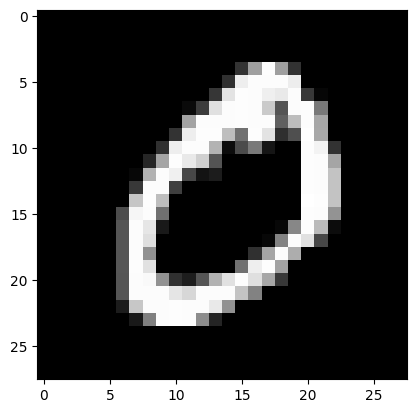

In [ ]:
positive_images, negative_images = set_mnist_pos_neg(0, 1)

# Display a sample positive image
import matplotlib.pyplot as plt
plt.imshow(positive_images[0].reshape(28, 28), cmap='gray')
plt.show()


Now you need to:
1. Create 10 *one-vs-all* datasets for all digits
1. Train 10 perceptrons
1. Define `classify` function to perform digit classification
1. Measure the accuracy of classification and print *confusion matrix*
1. [Optional] Create improved `classify` function that performs the classification using one matrix multiplication.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Step 1: Load the MNIST data
with open('mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle, encoding='latin1')

# Unpack the training data
train_features, train_labels = MNIST[0]
train_features = train_features.astype(np.float32) / 255.0  # Normalize
train_labels = train_labels.astype(int)  # Ensure labels are integer

# Convert features and labels to tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)

# Step 2: Train 10 perceptrons, one for each digit
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(28 * 28, 1)  # 28*28 input, single output for binary classification

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten image
        return torch.sigmoid(self.fc(x))  # Sigmoid output for binary classification

# Dictionary to hold each perceptron model
perceptrons = {}

# Train one perceptron for each digit
for digit in range(10):
    # Prepare one-vs-all labels (1 for the target digit, 0 for others)
    binary_labels = (train_labels == digit).float()
    
    # Initialize model, loss, and optimizer
    model = Perceptron()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Training loop
    epochs = 5
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(train_features)
        loss = criterion(outputs.squeeze(), binary_labels)
        loss.backward()
        optimizer.step()
    
    # Save the trained model for this digit
    perceptrons[digit] = model
    print(f"Perceptron for digit {digit} trained.")

# Step 3: Define classify function for multi-class classification
def classify(features):
    # Get predictions from each perceptron
    outputs = []
    for digit in range(10):
        model = perceptrons[digit]
        output = model(features).detach().numpy().squeeze()
        outputs.append(output)
    
    # Stack outputs and take argmax to get the predicted class
    outputs = np.stack(outputs, axis=1)  # Shape: [num_samples, 10]
    predictions = np.argmax(outputs, axis=1)
    return predictions

# Step 4: Measure accuracy and print confusion matrix
train_predictions = classify(train_features)
train_labels_np = train_labels.numpy()  # Convert labels to numpy for evaluation

accuracy = accuracy_score(train_labels_np, train_predictions)
conf_matrix = confusion_matrix(train_labels_np, train_predictions)

print(f"Training Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Improved classify function using one matrix multiplication
class MultiPerceptron(nn.Module):
    def __init__(self):
        super(MultiPerceptron, self).__init__()
        self.fc = nn.Linear(28 * 28, 10)  # 10 outputs for each digit class

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        return self.fc(x)  # No activation here; we use argmax for classification

# Train the multi-perceptron model (optional, alternative method)
multi_model = MultiPerceptron()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(multi_model.parameters(), lr=0.001)

epochs = 5
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = multi_model(train_features)
    loss = criterion(outputs, train_labels)
    loss.backward()
    optimizer.step()

print("Multi-perceptron model trained.")

# Evaluate the multi-perceptron model
with torch.no_grad():
    multi_outputs = multi_model(train_features)
    multi_predictions = torch.argmax(multi_outputs, dim=1).numpy()
    multi_accuracy = accuracy_score(train_labels_np, multi_predictions)
    multi_conf_matrix = confusion_matrix(train_labels_np, multi_predictions)

print(f"Multi-perceptron Training Accuracy: {multi_accuracy * 100:.2f}%")
print("Multi-perceptron Confusion Matrix:")
print(multi_conf_matrix)


Perceptron for digit 0 trained.
Perceptron for digit 1 trained.
Perceptron for digit 2 trained.
Perceptron for digit 3 trained.
Perceptron for digit 4 trained.
Perceptron for digit 5 trained.
Perceptron for digit 6 trained.
Perceptron for digit 7 trained.
Perceptron for digit 8 trained.
Perceptron for digit 9 trained.
Training Accuracy: 11.36%
Confusion Matrix:
[[   0 4932    0    0    0    0    0    0    0    0]
 [   0 5678    0    0    0    0    0    0    0    0]
 [   0 4968    0    0    0    0    0    0    0    0]
 [   0 5101    0    0    0    0    0    0    0    0]
 [   0 4859    0    0    0    0    0    0    0    0]
 [   0 4506    0    0    0    0    0    0    0    0]
 [   0 4951    0    0    0    0    0    0    0    0]
 [   0 5175    0    0    0    0    0    0    0    0]
 [   0 4842    0    0    0    0    0    0    0    0]
 [   0 4988    0    0    0    0    0    0    0    0]]
Multi-perceptron model trained.
Multi-perceptron Training Accuracy: 9.72%
Multi-perceptron Confusion Matr

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score

# Step 1: Load the MNIST data
with open('mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle, encoding='latin1')

# Unpack the training data
train_features, train_labels = MNIST[0]
train_features = train_features.astype(np.float32) / 255.0  # Normalize
train_labels = train_labels.astype(int)  # Ensure labels are integer

# Convert features and labels to tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)

# Step 2: Define a Multi-Layer Perceptron model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)  # First hidden layer with 256 units
        self.fc2 = nn.Linear(256, 128)      # Second hidden layer with 128 units
        self.fc3 = nn.Linear(128, 10)       # Output layer for 10 classes

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x  # Output without activation; we will use CrossEntropyLoss

# Step 3: Train the MLP model
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 20  # Increase epochs to give the model more time to learn
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(train_features)
    loss = criterion(outputs, train_labels)
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Step 4: Evaluate accuracy and print confusion matrix
with torch.no_grad():
    outputs = model(train_features)
    _, predictions = torch.max(outputs, 1)
    predictions = predictions.numpy()
    train_labels_np = train_labels.numpy()  # Convert labels to numpy for evaluation

    accuracy = accuracy_score(train_labels_np, predictions)
    conf_matrix = confusion_matrix(train_labels_np, predictions)

print(f"Training Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)


Epoch [1/20], Loss: 2.3041
Epoch [2/20], Loss: 2.3035
Epoch [3/20], Loss: 2.3030
Epoch [4/20], Loss: 2.3025
Epoch [5/20], Loss: 2.3020
Epoch [6/20], Loss: 2.3016
Epoch [7/20], Loss: 2.3012
Epoch [8/20], Loss: 2.3008
Epoch [9/20], Loss: 2.3004
Epoch [10/20], Loss: 2.3000
Epoch [11/20], Loss: 2.2997
Epoch [12/20], Loss: 2.2993
Epoch [13/20], Loss: 2.2990
Epoch [14/20], Loss: 2.2986
Epoch [15/20], Loss: 2.2982
Epoch [16/20], Loss: 2.2978
Epoch [17/20], Loss: 2.2974
Epoch [18/20], Loss: 2.2970
Epoch [19/20], Loss: 2.2965
Epoch [20/20], Loss: 2.2959
Training Accuracy: 11.36%
Confusion Matrix:
[[   0 4932    0    0    0    0    0    0    0    0]
 [   0 5678    0    0    0    0    0    0    0    0]
 [   0 4968    0    0    0    0    0    0    0    0]
 [   0 5101    0    0    0    0    0    0    0    0]
 [   0 4859    0    0    0    0    0    0    0    0]
 [   0 4506    0    0    0    0    0    0    0    0]
 [   0 4951    0    0    0    0    0    0    0    0]
 [   0 5175    0    0    0    0   

In [ ]:
# Filter the dataset to only include two classes (0 and 1) for easier debugging
binary_indices = (train_labels == 0) | (train_labels == 1)
binary_features = train_features[binary_indices]
binary_labels = train_labels[binary_indices]

# Define a simple model for binary classification
class BinaryMLP(nn.Module):
    def __init__(self):
        super(BinaryMLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)  # Output layer for binary classification

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)  # No activation, raw logits for CrossEntropyLoss

# Initialize and train on the simplified binary dataset
binary_model = BinaryMLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(binary_model.parameters(), lr=0.001)

# Training loop for binary classification
epochs = 10
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = binary_model(binary_features)
    loss = criterion(outputs, binary_labels)
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluate on binary dataset
with torch.no_grad():
    binary_outputs = binary_model(binary_features)
    _, binary_predictions = torch.max(binary_outputs, 1)
    binary_accuracy = accuracy_score(binary_labels, binary_predictions)
    binary_conf_matrix = confusion_matrix(binary_labels, binary_predictions)

print(f"Binary Classification Accuracy: {binary_accuracy * 100:.2f}%")
print("Binary Confusion Matrix:")
print(binary_conf_matrix)


Epoch [1/10], Loss: 0.6960
Epoch [2/10], Loss: 0.6953
Epoch [3/10], Loss: 0.6947
Epoch [4/10], Loss: 0.6940
Epoch [5/10], Loss: 0.6934
Epoch [6/10], Loss: 0.6928
Epoch [7/10], Loss: 0.6923
Epoch [8/10], Loss: 0.6917
Epoch [9/10], Loss: 0.6911
Epoch [10/10], Loss: 0.6905
Binary Classification Accuracy: 53.52%
Binary Confusion Matrix:
[[   0 4932]
 [   0 5678]]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score

# Define an improved model with additional hidden layers and dropout
class ImprovedMLP(nn.Module):
    def __init__(self):
        super(ImprovedMLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 2)  # Output layer for binary classification

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        return self.fc4(x)  # Raw logits for CrossEntropyLoss

# Initialize the model, criterion, and optimizer
improved_model = ImprovedMLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(improved_model.parameters(), lr=0.0001)  # Lower learning rate

# Training loop with more epochs
epochs = 30  # Increased epochs to allow the model more time to learn
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = improved_model(binary_features)
    loss = criterion(outputs, binary_labels)
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluate accuracy and confusion matrix on the binary dataset
with torch.no_grad():
    improved_outputs = improved_model(binary_features)
    _, improved_predictions = torch.max(improved_outputs, 1)
    improved_accuracy = accuracy_score(binary_labels, improved_predictions)
    improved_conf_matrix = confusion_matrix(binary_labels, improved_predictions)

print(f"Improved Binary Classification Accuracy: {improved_accuracy * 100:.2f}%")
print("Improved Binary Confusion Matrix:")
print(improved_conf_matrix)


Epoch [1/30], Loss: 0.6929
Epoch [2/30], Loss: 0.6929
Epoch [3/30], Loss: 0.6928
Epoch [4/30], Loss: 0.6927
Epoch [5/30], Loss: 0.6927
Epoch [6/30], Loss: 0.6926
Epoch [7/30], Loss: 0.6926
Epoch [8/30], Loss: 0.6925
Epoch [9/30], Loss: 0.6925
Epoch [10/30], Loss: 0.6924
Epoch [11/30], Loss: 0.6924
Epoch [12/30], Loss: 0.6923
Epoch [13/30], Loss: 0.6922
Epoch [14/30], Loss: 0.6922
Epoch [15/30], Loss: 0.6921
Epoch [16/30], Loss: 0.6920
Epoch [17/30], Loss: 0.6920
Epoch [18/30], Loss: 0.6919
Epoch [19/30], Loss: 0.6919
Epoch [20/30], Loss: 0.6918
Epoch [21/30], Loss: 0.6918
Epoch [22/30], Loss: 0.6917
Epoch [23/30], Loss: 0.6917
Epoch [24/30], Loss: 0.6916
Epoch [25/30], Loss: 0.6915
Epoch [26/30], Loss: 0.6915
Epoch [27/30], Loss: 0.6915
Epoch [28/30], Loss: 0.6914
Epoch [29/30], Loss: 0.6914
Epoch [30/30], Loss: 0.6913
Improved Binary Classification Accuracy: 53.52%
Improved Binary Confusion Matrix:
[[   0 4932]
 [   0 5678]]


In [ ]:
!pip install --upgrade ipykernel



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pickle  # Make sure pickle is imported to load data
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Step 1: Load the MNIST data
with open('mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle, encoding='latin1')

# Unpack the training data
train_features, train_labels = MNIST[0]
train_features = train_features.astype(np.float32) / 255.0  # Normalize
train_labels = train_labels.astype(int)  # Ensure labels are integer

# Convert features and labels to tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)

# Define the rest of your model and training code below


In [10]:
# Filter the dataset to only include two classes (0 and 1) for easier debugging
binary_indices = (train_labels == 0) | (train_labels == 1)
binary_features = train_features[binary_indices]
binary_labels = train_labels[binary_indices]

# Define a CNN model for binary classification
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, 2)  # Output layer for binary classification

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)  # Reshape for CNN: [batch_size, channels, height, width]
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(-1, 64 * 28 * 28)  # Flatten
        x = torch.relu(self.fc1(x))
        return self.fc2(x)  # Raw logits for CrossEntropyLoss

# Initialize the CNN model, loss, and optimizer
cnn_model = SimpleCNN()
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss directly for logits
optimizer = optim.Adam(cnn_model.parameters(), lr=0.0001)  # Lower learning rate

# Training loop for the CNN
epochs = 20  # Increased epochs
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = cnn_model(binary_features)
    loss = criterion(outputs, binary_labels)
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluate accuracy and confusion matrix on the binary dataset
with torch.no_grad():
    cnn_outputs = cnn_model(binary_features)
    _, cnn_predictions = torch.max(cnn_outputs, 1)
    cnn_accuracy = accuracy_score(binary_labels, cnn_predictions)
    cnn_conf_matrix = confusion_matrix(binary_labels, cnn_predictions)

print(f"CNN Binary Classification Accuracy: {cnn_accuracy * 100:.2f}%")
print("CNN Binary Confusion Matrix:")
print(cnn_conf_matrix)

: 